In [13]:
import os, sys
import pandas as pd
from tensorflow.keras.models import load_model
sys.path.append("/work/test-first-project/src")
from data_utils import load_training_data
import matplotlib.pyplot as plt

<AxesSubplot:>

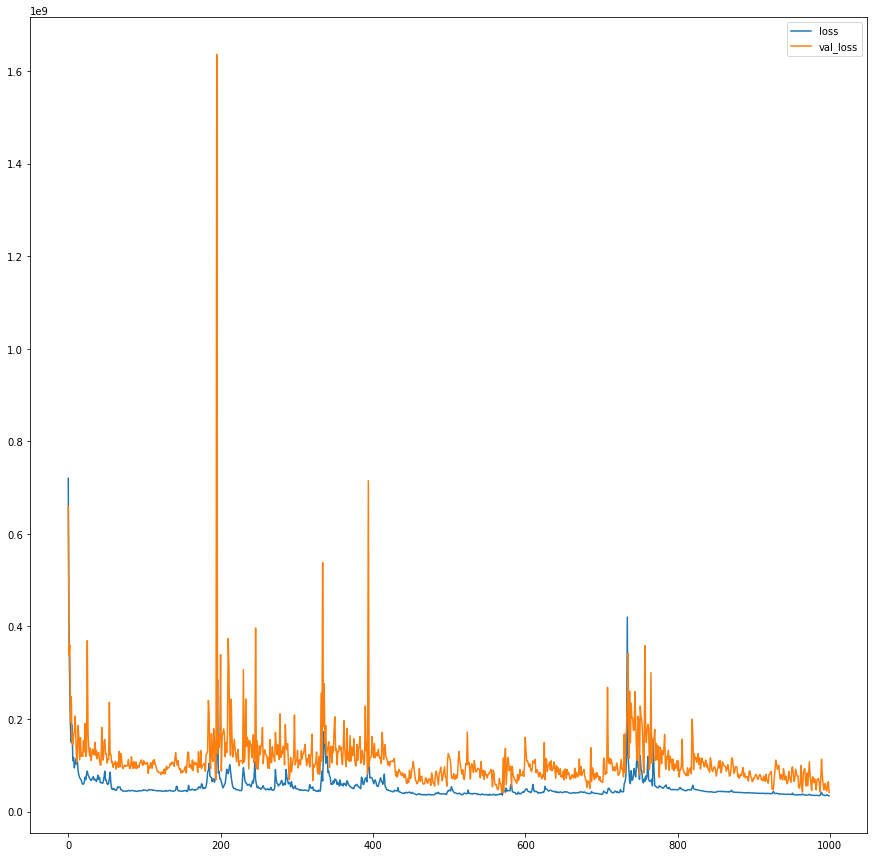

In [2]:
model_folder = "/work/test-first-project/data/models/model_1/"
csv_path = os.path.join(model_folder, "score.csv")
model_path = os.path.join(model_folder, "model/")

score_df = pd.read_csv(csv_path)
score_df.plot(figsize=(15,15))

In [3]:
input_seq, output_seq, last_in_dates, country_array = load_training_data()

In [4]:
model = load_model(model_path)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 25)            1275      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 1)             26        
Total params: 32,101
Trainable params: 32,101
Non-trainable params: 0
_________________________________________________________________


In [6]:
input_seq.shape

(7258, 20, 2)

In [7]:
predictions = model.predict(input_seq)

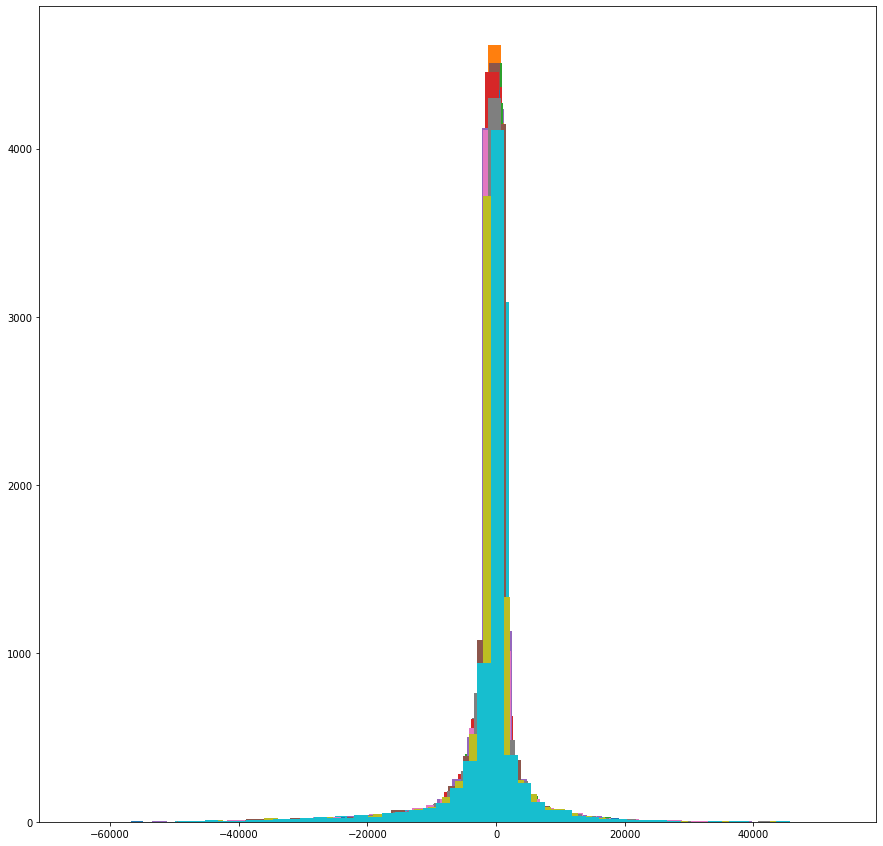

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
for i in range(predictions.shape[1]):
    
    ax.hist(predictions[:, i, :] - output_seq[:, i, :], bins=50)

In [8]:
predictions - output_seq

array([[[-185.45375061],
        [-211.48765564],
        [  15.41738892],
        ...,
        [-277.63272095],
        [ -38.6322937 ],
        [   4.36791992]],

       [[-251.39013672],
        [   5.02897644],
        [-191.32769775],
        ...,
        [ -22.29064941],
        [  20.7093811 ],
        [ -29.2906189 ]],

       [[ -36.47090149],
        [-188.12298584],
        [  17.30697632],
        ...,
        [  65.677948  ],
        [  15.677948  ],
        [ -13.322052  ]],

       ...,

       [[2403.97851562],
        [2638.08349609],
        [3398.49169922],
        ...,
        [1710.20361328],
        [1611.72900391],
        [1499.57080078]],

       [[2423.78100586],
        [2834.75537109],
        [2741.05615234],
        ...,
        [1443.31884766],
        [1330.18017578],
        [1418.26220703]],

       [[2710.65722656],
        [2294.81884766],
        [2394.87939453],
        ...,
        [1204.63525391],
        [1291.67041016],
        [1149.87158203]]